## Usage of Mapillary Data:

   -[Mapilary Dataset Github Repo](https://github.com/mapillary/mapillary_sls)
   
   -[Mapillary Pytorch Git](https://github.com/mapillary/mapillary_sls/blob/master/datasets/msls.py)
    
   -[Mapilary Demo](https://github.com/mapillary/mapillary_sls/blob/master/demo.ipynb)
   
   - [Mapilary Research Paper](https://research.mapillary.com/img/publications/CVPR20c.pdf)
   
   - [Mapillary suplementary material](https://research.mapillary.com/img/publications/CVPR20c_supp.pdf)
   
   -[Oslandia](https://github.com/Oslandia/deeposlandia)
        

## Tutorials

[Tensor Flow Load Images Tutorial](https://www.tensorflow.org/tutorials/load_data/images)

[Tensor Flow Image Classification Tutorial](https://www.tensorflow.org/tutorials/images/classification)

[Pillow](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

In [1]:
import tensorflow as tf
import cv2
import pandas as pd
import numpy as np
import os
import shutil
from pathlib import Path
import glob
import random
import matplotlib.pyplot as plt
import seaborn as sns


/Users/Arad/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Set directory of files and select cities

In [2]:
root_folder = Path('/Users/Arad/ITC/Final Project/Mapillary/train_val/')
sample_output_dir = Path('/Users/Arad/ITC/Final Project/Samples/')

good_cities = ['moscow',
 'budapest',
 'melbourne',
 'phoenix',
 'ottawa',
 'bangkok',
 'berlin',
 'tokyo',
 'saopaulo',
 'helsinki',
 'austin',
 'boston',
 'toronto',
 'amsterdam',
 'cph',
 'paris',
 'manila',
 'goa',
 'sf']

# cities_path = glob.glob(str(root_folder / '*'))
# cities = [file_name.split('/')[-1] for file_name in cities_path]
# # idxs = [3,4,6,10,16,19,21,22,23] # these are indexes of citie with many images 
# # select_cities = [cities[i] for i in idxs]
# # select_cities = ['moscow','berlin','bangkok']

In [84]:

train_images,val_images,test_images = [],[],[]
for city in good_cities:
    train_images += glob.glob(str(sample_output_dir / 'train' /city / "*"))
    val_images += glob.glob(str(sample_output_dir / 'val' /city / "*"))
    test_images += glob.glob(str(sample_output_dir / 'test' /city / "*"))
    
len(train_images),len(val_images),len(test_images)

(16841, 6578, 0)

## Sample images and resstructure folders

### sample random 10k of 19 cities

In [24]:
# def get_all_images(city):
    
#     db_path = Path(root_folder) / city / 'database'
#     query_path = Path(root_folder) / city / 'query'

#     ## sample from both database and query folders
#     seq_database = pd.read_csv(db_path / 'seq_info.csv')
#     seq_query = pd.read_csv(query_path / 'seq_info.csv')
    
#     seq_database = seq_database[['key','sequence_key']].copy()
#     seq_database['city'] = city
#     seq_database['source'] = 'database'
    
#     seq_query = seq_query[['key','sequence_key']].copy()
#     seq_query['city'] = city
#     seq_query['source'] = 'query'
    
#     return pd.concat([seq_database,seq_query]).reset_index()

In [8]:
# # create a df of all images
# all_keys_df = pd.DataFrame()
# for city in cities:
#     s = get_all_images(city)
#     all_keys_df = pd.concat([all_keys_df,s])
    
# # select only cities with more than 10k images overall
# good_cities = all_keys_df.city.value_counts().index[:19].to_list()
# keys_df = all_keys_df[all_keys_df.city.isin(good_cities)]

# # sample 10k from each city
# random_10k_df = pd.DataFrame()
# for city in good_cities:
#     df = keys_df[keys_df.city==city].sample(n=10000)
#     random_10k_df = pd.concat([random_10k_df,df],ignore_index=True)

# # add filename column to the df
# random_10k_df['file_name'] = random_10k_df.apply(lambda x: str(
#     root_folder / x.city / x.source / 'images' / x.key)+'.jpg',axis=1)

# # copy files to train val and test folders
# for city in good_cities:
#     df = random_10k_df[random_10k_df.city==city]
#     train = df[df.source=='database'].file_name.to_list()
#     val = df[df.source=='query'].file_name.to_list()
    
#     train_dest = Path(sample_output_dir) / 'train' / city
#     val_dest = Path(sample_output_dir) / 'val' / city
#     test_dest = Path(sample_output_dir) / 'test' / city
    
#     Path(train_dest).mkdir(parents=True,exist_ok=True)
#     Path(val_dest).mkdir(parents=True,exist_ok=True)
#     Path(test_dest).mkdir(parents=True,exist_ok=True)
    
#     for file_name in train:
#         if os.path.isfile(file_name):
#             shutil.copy(file_name, train_dest)
            
#     random.shuffle(val)
    
#     for file_name in val[:len(val)//2]:
#         if os.path.isfile(file_name):
#             shutil.copy(file_name, val_dest)
            
#     for file_name in val[len(val)//2:]:
#         if os.path.isfile(file_name):
#             shutil.copy(file_name, test_dest)
            
#     print(city,f'files successfully copied to output folder')

### Sample n images per sequence

In [4]:
# def sample_images(city,root_folder,output_folder,n=5,create_copies=True):
#     """samples n images per sequence from mappilary raw images
#        and copies them to a new ouput folder"""
    
#     db_path = Path(root_folder) / city / 'database'
#     query_path = Path(root_folder) / city / 'query'

#     ## sample from both database and query folders
#     seq_database = pd.read_csv(db_path / 'seq_info.csv')
#     seq_query = pd.read_csv(query_path / 'seq_info.csv')
    
#     db_keys,q_keys = [],[]
#     for seq in seq_database.sequence_key.value_counts().index:
#         db_keys += seq_database[seq_database.sequence_key==seq].sample(n=n,replace=True).key.to_list()
#     for seq in seq_query.sequence_key.value_counts().index:
#         q_keys += seq_query[seq_query.sequence_key==seq].sample(n=n,replace=True).key.to_list()


#     db_sample = [str(db_path / 'images/' / filename) + '.jpg' for filename in db_keys]
#     q_sample = [str(query_path / 'images/' / filename) + '.jpg' for filename in q_keys]

#     sample = db_sample+q_sample
#     if create_copies:
#         ## copy files to new folder
#         dest = Path(output_folder) / city
#         Path(dest).mkdir(parents=True,exist_ok=True)

#         for file_name in sample:
#             if os.path.isfile(file_name):
#                 shutil.copy(file_name, dest)
#         print(city,f'files successfully copied to {dest}')
#     return sample
    

In [4]:
# for city in select_cities:
#     sample_images(city,root_folder,sample_output_dir,n=2)

moscow files successfully copied to /Users/Arad/ITC/Final Project/Samples/moscow
berlin files successfully copied to /Users/Arad/ITC/Final Project/Samples/berlin
bangkok files successfully copied to /Users/Arad/ITC/Final Project/Samples/bangkok


### Split files to train, validation and test folders

In [5]:
# def split_train_test_val(city,sample_root_folder=sample_output_dir,train_size=0.8):
    
#     file_names = glob.glob(str(sample_root_folder / city / "*"))

#     num_train = round(train_size*len(file_names))

#     ## shuffle file names 
#     random.shuffle(file_names)

#     train_dest = sample_root_folder / 'train' / city
#     val_dest = sample_root_folder / 'val' / city
#     test_dest = sample_root_folder / 'test' / city

#     Path(train_dest).mkdir(parents=True,exist_ok=True)
#     Path(val_dest).mkdir(parents=True,exist_ok=True)
#     Path(test_dest).mkdir(parents=True,exist_ok=True)

#     # move train files to train folder
#     train_files = file_names[:num_train]

#     for file_name in train_files:
#         if os.path.isfile(file_name):
#             shutil.move(file_name, train_dest/ file_name.split('/')[-1])

#     val_test_index = (len(file_names)-num_train)//2

#     # move val files to val folder
#     val_files = file_names[num_train:num_train+val_test_index]

#     for file_name in val_files:
#         if os.path.isfile(file_name):
#             shutil.move(file_name, val_dest / file_name.split('/')[-1])

#     test_files = file_names[num_train+val_test_index:]

#     for file_name in test_files:
#         if os.path.isfile(file_name):
#             shutil.move(file_name, test_dest / file_name.split('/')[-1])
#     print(f"{city} has {len(file_names)} images sampled, {num_train} saved in train folder, {len(val_files)} in val and {len(test_files)} in test")


In [6]:
# for city in select_cities:
#     split_train_test_val(city)

moscow has 12112 images sampled, 9690 saved in train folder, 1211 in val and 1211 in test
berlin has 3681 images sampled, 2945 saved in train folder, 368 in val and 368 in test
bangkok has 2959 images sampled, 2367 saved in train folder, 296 in val and 296 in test


## RandomForest - GreyScale model

### Get all cities filenames per set

### Preprocess images - resize, crop and save labels

In [12]:
## plot from file
# def plot_and_predict(path):
#     pr = cv2.imread(path, cv2.IMREAD_COLOR)
#     plt.imshow(pr)
#     plt.show()
    

In [13]:
## plot from np.array
# plt.figure(figsize=(20,10))
# col = 2
# for i in range(col):
#     plt.subplot(5/col+1, col, i+1)
#     plt.imshow(X[i].reshape(150,150), cmap='Greys_r')

In [170]:
def read_and_process_image(list_of_images,list_of_cities,crop=0.3,greyscale=True):
    """ read images from files
        apply greyscale, resize and crop 
        return np array of images (X) and np array of labels (y)"""
    X = [] # images
    y = [] # lables

    for i,image in enumerate(list_of_images):
        try:
            if greyscale:
                new_image = cv2.imread(image,cv2.IMREAD_GRAYSCALE)
                height = int((new_image).shape[0]*(1-crop))
                X.append(cv2.resize(new_image[:height, :], (150, 150)).ravel())
            elif not greyscale:
                new_image = cv2.imread(image,cv2.IMREAD_COLOR)
                height = int((new_image).shape[0]*(1-crop))
                X.append(cv2.resize(new_image[:height, :], (150, 150)))
            for j,city in enumerate(list_of_cities):
                if city == image.split('/')[-2]:
                    y.append(j)
        except TypeError as e:
            print(e,'on index',i)

    return np.array(X), np.array(y)

In [15]:
X_train,y_train = read_and_process_image(train_images,good_cities)

In [16]:
X_val,y_val = read_and_process_image(val_images+test_images,good_cities) #note that val and test are combined

In [17]:
# X_test,y_test = read_and_process_image(test_images,select_cities)

### examine sets

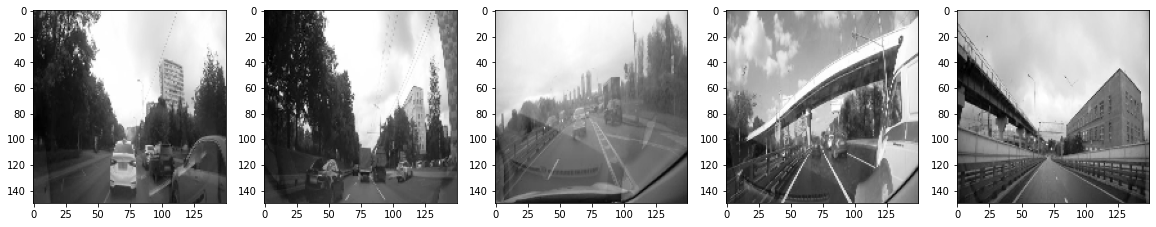

In [18]:
plt.figure(figsize=(20,10))
col = 5
for i in range(col):
    plt.subplot(5/col+1, col, i+1)
    plt.imshow(X_train[i].reshape(150,150), cmap='Greys_r')

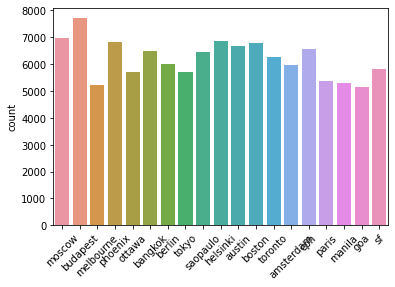

In [19]:
sns.countplot(y_train)
plt.xticks(range(len(good_cities)),labels=good_cities,rotation=45);

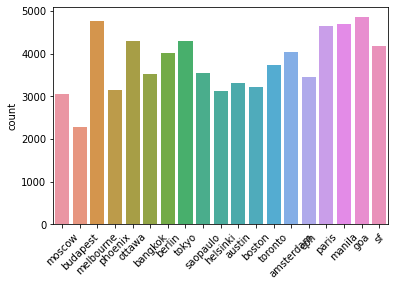

In [20]:
sns.countplot(y_val)
plt.xticks(range(len(good_cities)),labels=good_cities,rotation=45);

### Train random forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

In [22]:
## gridSearch - too heavy
# params = {'min_impurity_decrease': [10**-3,10**-4,10**-5],'min_samples_leaf':[2,5,10]}
# gs = GridSearchCV(RandomForestClassifier(),params,scoring='average_precision',verbose=10,n_jobs=-1)
# best_clf = gs.fit(np.concatenate([X_train,X_val]),np.concatenate([y_train,y_val]))
# best_clf.score(X_val, y_val)

In [23]:
X_train.shape,X_val.shape

((117810, 22500), (72190, 22500))

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

In [ ]:
rfc.score(X_val, y_val)

In [ ]:
rfc.score(X_val, y_val)

In [ ]:
rfc.score(X_val, y_val)

In [42]:
# rfc.feature_importances_.max()

0.0076502956532631065

### evaluate model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [ ]:
print(classification_report(y_val, rfc.predict(X_val),target_names=select_cities))

In [ ]:
plt.figure(figsize=(11,11))
sns.heatmap(confusion_matrix(y_val, rfc.predict(X_val)), annot=True, fmt='g',cmap = 'coolwarm',square=True)
plt.xticks(range(len(select_cities)),labels=select_cities)
plt.yticks(range(len(select_cities)),labels=select_cities,rotation=0)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Accuracy:{round(accuracy_score(y_val, rfc.predict(X_val)),3)}');

## Deep Learning - TF Convolutional Network

In [165]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,Cropping2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
batch_size = 128
epochs = 25
IMG_HEIGHT = 150
IMG_WIDTH = 150

### Flow from X_train,y_train

In [ ]:
# X_train,y_train = read_and_process_image(train_images,good_cities,greyscale=False)
# X_val,y_val = read_and_process_image(test_images,good_cities,greyscale=False)


In [62]:
# train_data_gen= train_image_generator.flow(X_train,y_train,batch_size=batch_size)
# val_data_gen= validation_image_generator.flow(X_val,y_val,batch_size=batch_size)

In [39]:
# X_train.shape

(15002, 150, 150, 3)

In [49]:
# from sklearn.preprocessing import OneHotEncoder
# def encode_labels(y):
#     ohe = OneHotEncoder()
#     y = ohe.fit_transform(y)
#     return y

In [56]:
# def prepare_targets(y):
#     y_enc = []
#     for i in y:
#         for j in range(y.value_counts().shape[0]):
#         if i==0:
#             y_enc.append(np.array([1,0,0]))
#         elif i==1:
#             y_enc.append(np.array([0,1,0]))
#         elif i ==2:
#             y_enc.append(np.array([0,0,1]))
    
#     return np.array(y_enc)

In [57]:
# y_train = prepare_targets(y_train)

In [60]:
# y_val = prepare_targets(y_val)

### Flow from directory

In [12]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [44]:
train_dir = sample_output_dir / 'train'
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH)
                                                          )

Found 117810 images belonging to 19 classes.


In [13]:
validation_dir = sample_output_dir / 'val'
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                               shuffle=True,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH)
                                                              )

Found 36091 images belonging to 19 classes.


In [55]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(train_data_gen.num_classes,activation='softmax')
])

In [75]:
# lr=1e-2
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],)

In [76]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 20736)            

In [78]:
# epochs = 12
# history = model.fit(
#     train_data_gen,
#     steps_per_epoch= 12,
#     epochs=epochs,
#     validation_data=val_data_gen,
#     validation_steps=3
# )

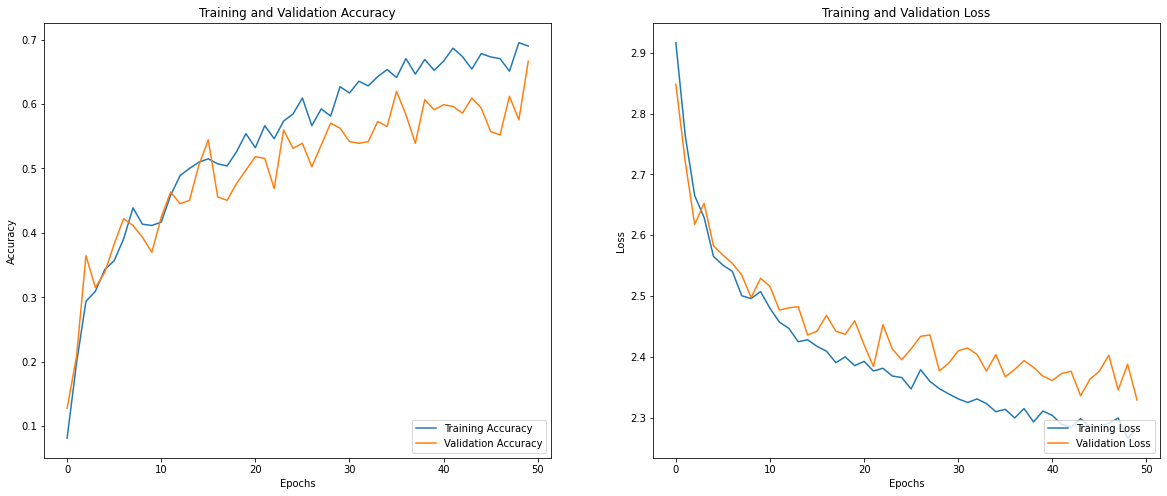

In [51]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss=history.history['loss']
# val_loss=history.history['val_loss']

# epochs_range = range(epochs)

# plt.figure(figsize=(20, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.title('Training and Validation Accuracy');

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend(loc='lower right')
# plt.show()

In [52]:
history = model.fit(
    train_data_gen,
    steps_per_epoch= len(train_images) // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,validation_steps=len(val_images) // batch_size
)

Epoch 1/50
920/920 [==============================] - 2217s 2s/step - loss: 2.2336 - accuracy: 0.7409 - val_loss: 2.2949 - val_accuracy: 0.6772
Epoch 2/50
920/920 [==============================] - 2438s 3s/step - loss: 2.1690 - accuracy: 0.8258 - val_loss: 2.2788 - val_accuracy: 0.7015
Epoch 3/50
920/920 [==============================] - 2569s 3s/step - loss: 2.1369 - accuracy: 0.8679 - val_loss: 2.2621 - val_accuracy: 0.7308
Epoch 4/50
920/920 [==============================] - 2591s 3s/step - loss: 2.1184 - accuracy: 0.8932 - val_loss: 2.2544 - val_accuracy: 0.7490
Epoch 5/50
920/920 [==============================] - 2608s 3s/step - loss: 2.1072 - accuracy: 0.9086 - val_loss: 2.2584 - val_accuracy: 0.7403
Epoch 6/50
920/920 [==============================] - 2626s 3s/step - loss: 2.0978 - accuracy: 0.9203 - val_loss: 2.2632 - val_accuracy: 0.7405
Epoch 7/50
920/920 [==============================] - 2600s 3s/step - loss: 2.0942 - accuracy: 0.9251 - val_loss: 2.2639 - val_accuracy:

KeyboardInterrupt: 

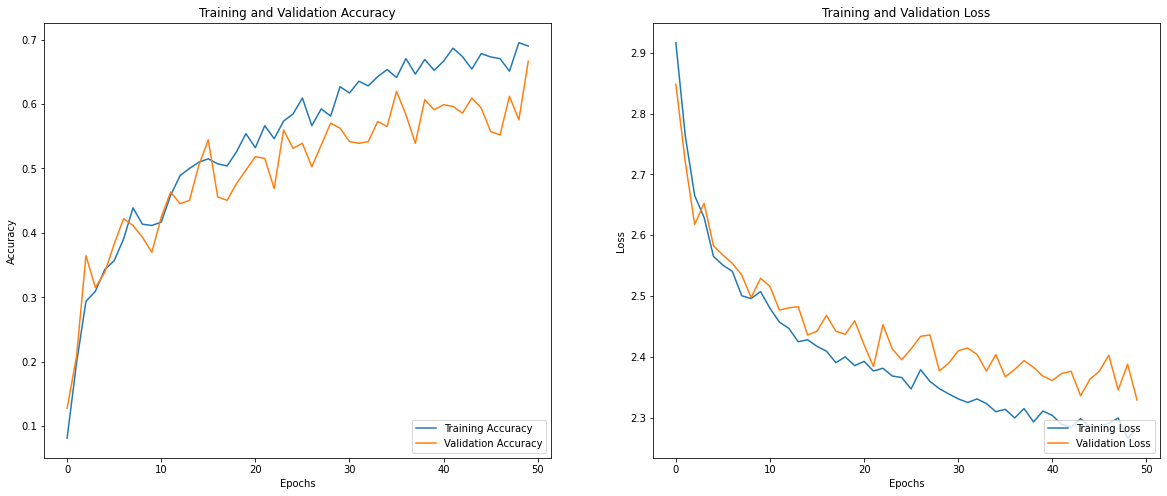

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy');

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

### Saving Model

In [54]:
## !pip install pyyaml h5py
# import os
# # Save the weights
# model.save_weights('./checkpoints/my_checkpoint')

# # Create a new model instance
# model = create_model()

# Restore the weights
# model.load_weights('./checkpoints/my_checkpoint')

# # Evaluate the model
# loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
# print("Restored model, accuracy: {:5.2f}%".format(100*acc))


## evaluating model

In [64]:
from sklearn.metrics import classification_report,confusion_matrix

In [89]:
validation_dir = sample_output_dir / 'val'
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                               shuffle=False,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH)
                                                              )

Found 36091 images belonging to 19 classes.


In [90]:
val_data_gen.reset()
Y_pred = model.predict_generator(val_data_gen,steps=len(val_images) // batch_size+1,verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

282/282 [==============================] - 390s 1s/step


Confusion Matrix


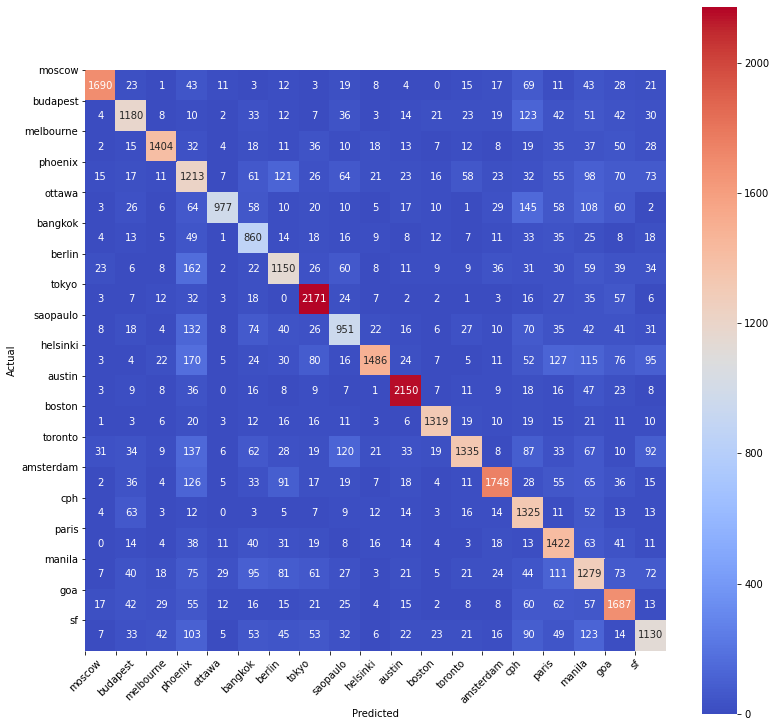

In [97]:
print('Confusion Matrix')
cm = confusion_matrix(val_data_gen.classes, y_pred)

plt.figure(figsize=(13,13))
sns.heatmap(cm, annot=True, fmt='g',cmap = 'coolwarm',square=True)
plt.xticks(range(len(good_cities)),labels=good_cities,rotation=45)
plt.yticks(range(len(good_cities)),labels=good_cities,rotation=0)
plt.xlabel('Predicted')
plt.ylabel('Actual');
# plt.title(f'Accuracy:{round(accuracy_score(y_val, rfc.predict(X_val)),3)}');

In [92]:
print('Classification Report')
print(classification_report(val_data_gen.classes, y_pred, target_names=good_cities))

Classification Report
              precision    recall  f1-score   support

      moscow       0.93      0.84      0.88      2021
    budapest       0.75      0.71      0.73      1660
   melbourne       0.88      0.80      0.83      1759
     phoenix       0.48      0.61      0.54      2004
      ottawa       0.90      0.61      0.72      1609
     bangkok       0.57      0.75      0.65      1146
      berlin       0.67      0.67      0.67      1725
       tokyo       0.82      0.89      0.86      2426
    saopaulo       0.65      0.61      0.63      1561
    helsinki       0.90      0.63      0.74      2352
      austin       0.89      0.90      0.89      2386
      boston       0.89      0.87      0.88      1521
     toronto       0.83      0.62      0.71      2151
   amsterdam       0.86      0.75      0.81      2320
         cph       0.58      0.84      0.69      1579
       paris       0.64      0.80      0.71      1770
      manila       0.54      0.61      0.57      2086
     

In [75]:
## plot image from file with real lable

import matplotlib.image as mpimg

def plot_image(file_names,index):
    print(file_names[index].split('/')[-2])
    plt.figure(figsize=(10,6))
    img=mpimg.imread(file_names[index])
    imgplot = plt.imshow(img)
    plt.show()

In [149]:
## see where the model is most sure for certain city
pd.DataFrame(Y_pred)[17].sort_values()

0        0.0
19490    0.0
19488    0.0
19487    0.0
19486    0.0
        ... 
33546    1.0
33547    1.0
33548    1.0
33519    1.0
34103    1.0
Name: 17, Length: 36091, dtype: float32

moscow


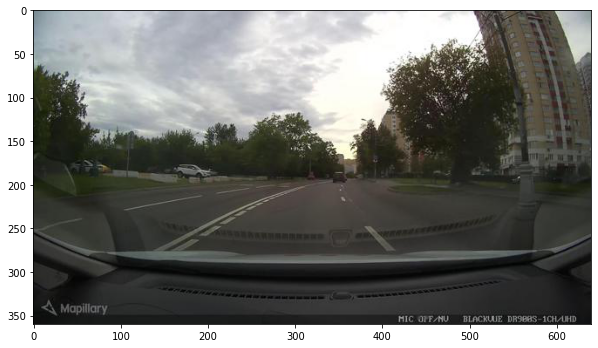

In [167]:
plot_image(val_images,4)

## Trying with 3 cities and dropout and augmentation and cropping

In [194]:
## Setting up dir with only three classes

sample_output_dir = Path('/Users/Arad/ITC/Final Project/three')
train_dir = sample_output_dir / 'train'

## setting up image generator with augmentation arguments
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.2,
                    shear_range=0.2,brightness_range=[0.2,1.0])

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),)

Found 16841 images belonging to 3 classes.


In [40]:
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data
validation_dir = sample_output_dir / 'val'
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                               shuffle=True,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH)
                                                              )

Found 6578 images belonging to 3 classes.


In [41]:
## redefine model with cropping layer and Dropout layer for regularization

model_new = Sequential([
    Cropping2D(cropping=((0, 40), (0, 0)),
                         input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(train_data_gen.num_classes,activation='softmax')
])

In [185]:
model_new.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d_3 (Cropping2D)    (None, 110, 150, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 110, 150, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 55, 75, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 55, 75, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 55, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 27, 37, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 27, 37, 64)       

In [196]:
model_new.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],)

In [190]:
## setup model saving function and path

checkpoint_path = "/Users/Arad/ITC/Final Project/checkpoints/three/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0,
                                                save_best_only=True)

In [198]:
# load weights
model_new.load_weights(checkpoint_path)    

In [199]:
history2 = model_new.fit(
    train_data_gen,
    steps_per_epoch=16841 // batch_size+1,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=6578// batch_size+1,
    callbacks=[cp_callback]
)

Epoch 1/25
104/132 [======================>.......] - ETA: 3:23 - loss: 0.7153 - accuracy: 0.8323

KeyboardInterrupt: 

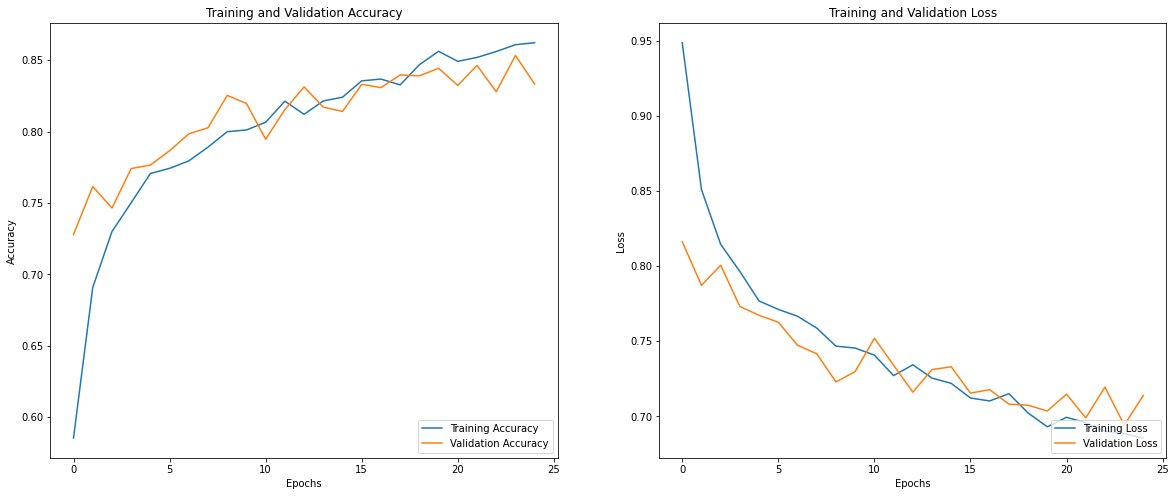

In [49]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy');

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

## Evaluating

In [50]:
sample_output_dir

PosixPath('/Users/Arad/ITC/Final Project/three')

In [56]:
validation_dir = sample_output_dir / 'val'
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                               shuffle=False,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH)
                                                              )

Found 6578 images belonging to 3 classes.


In [57]:
val_data_gen.reset()
Y_pred = model_new.predict_generator(val_data_gen,verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

52/52 [==============================] - 71s 1s/step


In [65]:
from sklearn.metrics import classification_report,confusion_matrix

In [78]:
sample_output_dir = Path('/Users/Arad/ITC/Final Project/three/')

cities_path = glob.glob(str(sample_output_dir / 'train' /'*'))
good_cities = [file_name.split('/')[-1] for file_name in cities_path]
good_cities

['tokyo', 'goa', 'berlin']

In [63]:
print('Classification Report')
print(classification_report(val_data_gen.classes, y_pred, target_names=good_cities))

Classification Report
              precision    recall  f1-score   support

       tokyo       0.78      0.81      0.79      2004
         goa       0.89      0.82      0.85      2426
      berlin       0.83      0.87      0.85      2148

    accuracy                           0.83      6578
   macro avg       0.83      0.83      0.83      6578
weighted avg       0.84      0.83      0.83      6578



Confusion Matrix


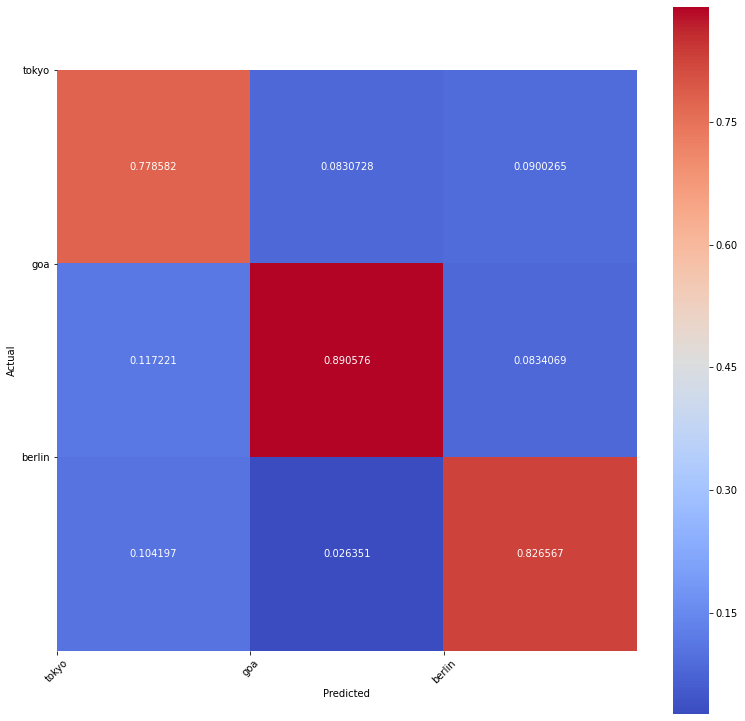

In [79]:
print('Confusion Matrix')
cm = confusion_matrix(val_data_gen.classes, y_pred,normalize='pred')

plt.figure(figsize=(13,13))
sns.heatmap(cm, annot=True, fmt='g',cmap = 'coolwarm',square=True)
plt.xticks(range(len(good_cities)),labels=good_cities,rotation=45)
plt.yticks(range(len(good_cities)),labels=good_cities,rotation=0)
plt.xlabel('Predicted')
plt.ylabel('Actual');
# plt.title(f'Accuracy:{round(accuracy_score(y_val, rfc.predict(X_val)),3)}');

In [106]:
## see where the model is most sure for certain city
tokyo_top = pd.DataFrame(Y_pred)[0].sort_values().tail(50).index
goa_top = pd.DataFrame(Y_pred)[1].sort_values().tail(50).index
berlin_top = pd.DataFrame(Y_pred)[2].sort_values().tail(50).index

tokyo_bottom = pd.DataFrame(Y_pred)[0].sort_values().head(20).index
goa_bottom = pd.DataFrame(Y_pred)[1].sort_values().head(20).index
berlin_bottom = pd.DataFrame(Y_pred)[2].sort_values().head(20).index

tokyo_random =  pd.DataFrame(Y_pred)[0].sample(50).index
goa_random =  pd.DataFrame(Y_pred)[1].sample(50).index
berlin_random =  pd.DataFrame(Y_pred)[2].sample(50).index

In [125]:
df = pd.DataFrame(Y_pred)
goa_middle = df[0][(df[0]>.8) & (df[0]<.95)].sort_values().index

In [127]:
# for i in goa_middle:
#     plot_image(val_images,i)

In [141]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [152]:
sample_val_images , _ = val_data_gen.next()

In [145]:
from itertools import islice

In [156]:
y_pred.shape

(6578,)

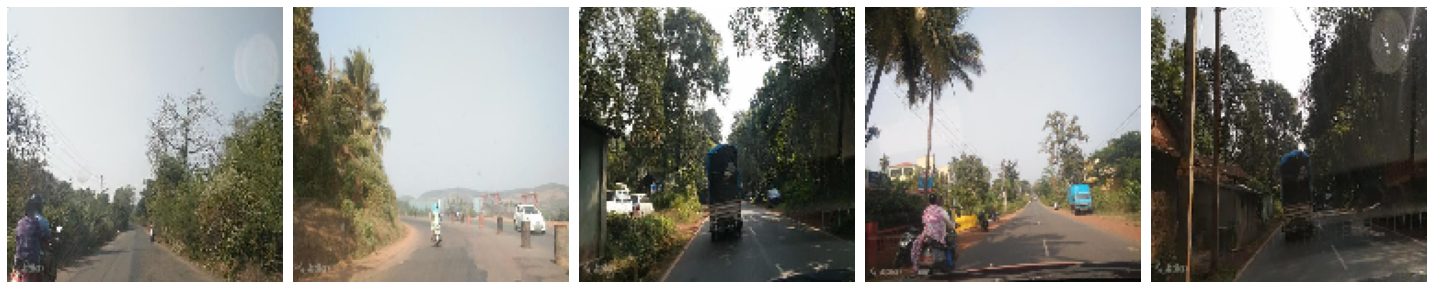

In [154]:
plotImages(sample_val_images[:5])

In [139]:
pred = model_new.predict(val_data_gen.next()[0][0][np.newaxis,:,:,:])
pred_class = np.argmax(pred)

In [140]:
pred_class

1

In [183]:
def plot_activation(img,model=model_new):
  
    pred = model.predict(img[np.newaxis,:,:,:])
    pred_class = np.argmax(pred)

    weights = model.layers[-1].get_weights()[0] #weights last classification layer
    class_weights = weights[:, pred_class]

    intermediate = Model(model.input, model.get_layer("conv2d_11").output)
    conv_output = intermediate.predict(img[np.newaxis,:,:,:])
    conv_output = np.squeeze(conv_output)

    h = int(img.shape[0]/conv_output.shape[0])
    w = int(img.shape[1]/conv_output.shape[1])

    activation_maps = sp.ndimage.zoom(conv_output, (h, w, 1), order=1)
    out = np.dot(activation_maps.reshape((img.shape[0]*img.shape[1], 512)), class_weights).reshape(img.shape[0],img.shape[1])

    plt.imshow(img.astype('float32').reshape(img.shape[0],img.shape[1],3))
    plt.imshow(out, cmap='jet', alpha=0.35)
    plt.title('Tokyo' if pred_class == 0 else ('Goa'if pred_class == 1 else 'Berlin'))
    

In [184]:
import scipy as sp
plot_activation(sample_val_images[0])

ValueError: cannot reshape array of size 1278720 into shape (16500,newaxis)

In [167]:
model_new.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d_3 (Cropping2D)    (None, 110, 150, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 110, 150, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 55, 75, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 55, 75, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 55, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 27, 37, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 27, 37, 64)       

## Deep Learning - Transfer learning with imageNet